In [4]:
################ tunable parameters


r=1
r=2

bmin0=3; bmax0=3; smin0=3; smax0=4
#bmin0=3; bmax0=2; smin0=3; smax0=4
#bmin0=3; bmax0=3; smin0=3; smax0=4
#bmin0=3; bmax0=4; smin0=3; smax0=4
ndbmin=1; ndbmax=1; ndsmin=1; ndsmax=1
ndbmin=1; ndbmax=3; ndsmin=1; ndsmax=1
#ndbmin=1; ndbmax=2; ndsmin=1; ndsmax=1

bmin0=7; bmax0=11; smin0=7; smax0=10
#bmin0=7; bmax0=8; smin0=6; smax0=10
#bmin0=7; bmax0=9; smin0=7; smax0=10
#bmin0=6; bmax0=6; smin0=6; smax0=6
#bmin0=5; bmax0=6; smin0=5; smax0=6
#bmin0=4; bmax0=5; smin0=4; smax0=5

ndbs=1
ndbmin=1; ndbmax=1; ndsmin=1; ndsmax=1
#ndbmin=3; ndbmax=1; ndsmin=3; ndsmax=1
#ndbmin=2; ndbmax=3; ndsmin=2; ndsmax=3
#ndbmin=3; ndbmax=3; ndsmin=3; ndsmax=3
#ndbmin=3; ndbmax=4; ndsmin=3; ndsmax=4
#ndbmin=2; ndbmax=6; ndsmin=2; ndsmax=5
#ndbmin=3; ndbmax=6; ndsmin=3; ndsmax=5
#ndbmin=5; ndbmax=8; ndsmin=5; ndsmax=8

w2=50#100#1000#256#128#16#25
h2=32#16
niter =2000#6#2000#1000#500#10000#5000#800 #2400 #1500
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
step2=120#12#60 #120 #1


tag1 time_s time11 pop_s population space_s w2 h2 w h rule_s rulespace rulestr


<IPython.core.display.Javascript object>


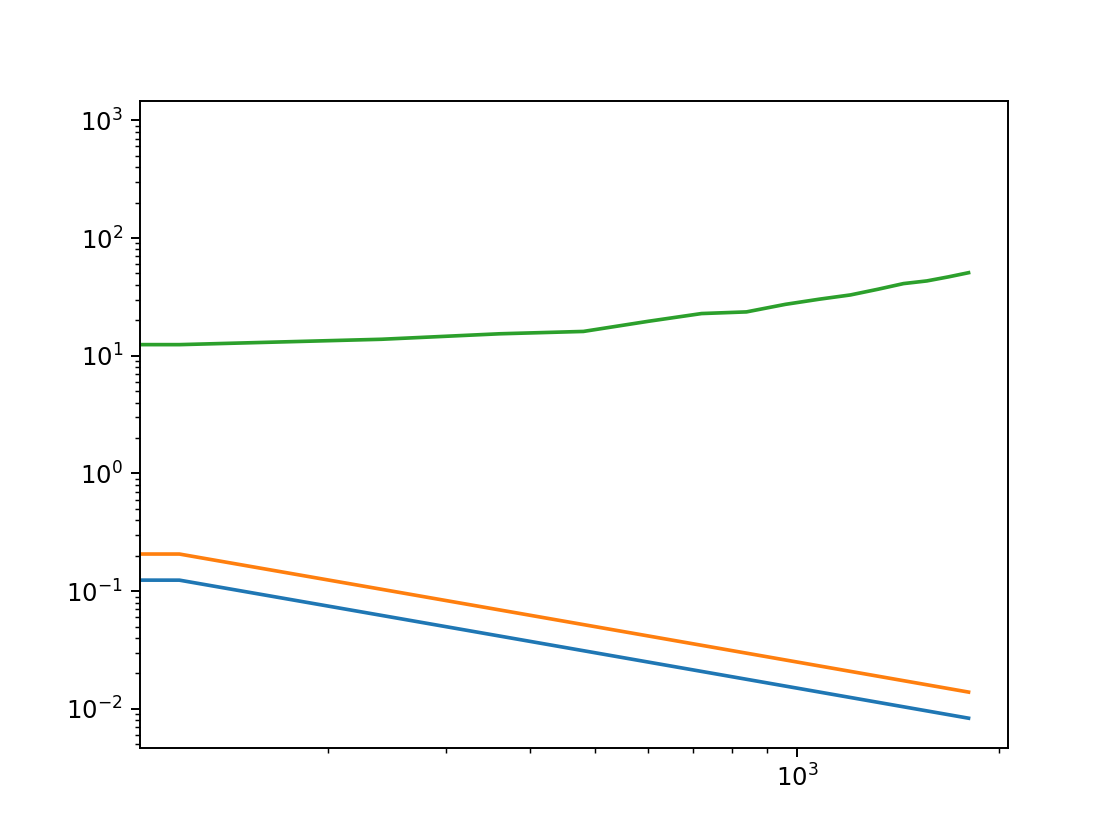

soup time 2000 pop 15 space 50 32 -627 617 rule lifelib r2b7t10s7t10
soup time 2000 pop 25 space 50 32 53 949 rule lifelib r2b7t11s7t10
soup time 2000 pop 103246 space 50 32 938 1005 rule lifelib r2b7t12s7t10


In [8]:
from __future__ import print_function

%matplotlib notebook
#%matplotlib inline
from matplotlib import pyplot as plt



schema1='tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
print(schema1.replace(',',' '))




plt.figure()

#plt.yscale('log')
plt.loglog()

plt.ion()
#plt.ioff()


import lifelib


for dbs in range(-ndbs,ndbs+1):
#for dbs in range(-1,2):
#for dbmax in range(ndbmax):

    bmin=bmin0#+dbs
    bmax=bmax0+dbs
    smin=smin0#+dbs
    smax=smax0#+dbs

    #rulestr='b3s23'
    #rulestr='r2b7t12s7t10'  ## niter <2000 or too much memory ? RADEJI ZATIM NEDAVAT DO FORUM
    #rulestr='b{}s23'.format(bmax)
    ######rulestr='r1b3t{}s3t4'.format(bmax)
    ##rulestr='r2b7t12s7t10'.format(bmax)
    rulestr='r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)
    
    rulestr=lifelib.sanirule(rulestr)
    sess = lifelib.load_rules(rulestr)
    #sess = lifelib.load_rules('r2b7t12s7t10')
    #sess = lifelib.load_rules('r2b7t9s7t10')

    lt = sess.lifetree()

    p1=lt.pattern()
    p=0.5 #0.3
    p1[0:h2, 0:w2] = p



    pops = []
    gens = []
    hs=[]
    ws=[]
    ys=[]
    
    currgen = 0

    for _ in range(int(niter/step2)):
        pops.append(p1.population)
        gens.append(currgen)
        
        bb=p1.bounding_box
        h=1
        w=1
        if bb:
            h=bb[2]-bb[0]
            w=bb[3]-bb[1]
        hs.append(h)
        ws.append(w)
        #ys.append(p1.population/h)
        ys.append(p1.population/(1+currgen))
        
        p1 = p1[step2]
        currgen += step2


    #plt.plot(gens, pops)
    #plt.plot(gens, hs)
    ###plt.plot(gens, pops/hs)
    plt.plot(gens, ys)
    plt.show()
    

    bb=p1.bounding_box
    #print(bb)
   
    h=1
    w=1
    if bb:
        h=bb[2]-bb[0]
        w=bb[3]-bb[1]


    tag1='soup'
    time_s='time'
    time11=niter
    pop_s='pop'
    population=p1.population
    space_s='space'
    rule_s='rule'
    rulespace='lifelib'

    print(tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)



In [9]:
!free -m
!top -b -n 1 | grep pyt

              total        used        free      shared  buff/cache   available
Mem:           4429        1466        1977          28         985        2680
Swap:           759           0         759
 1858 martin    20   0  338632  65360  14232 S  0,0  1,4   0:43.29 jupyter-not+
 3455 martin    20   0  618120  43008  13488 S  0,0  0,9   0:00.24 python3
 9976 martin    20   0 1047532 324068  25456 R  0,0  7,1   0:02.88 python3
12576 martin    20   0  618120  42956  13436 S  0,0  0,9   0:00.12 python3
14784 martin    20   0   52672  12884   7348 S  0,0  0,3   0:00.00 python3
14789 martin    20   0   52672  12856   7320 S  0,0  0,3   0:00.00 python3
14794 martin    20   0   52672  12856   7320 S  0,0  0,3   0:00.00 python3
14807 martin    20   0   52672  12880   7348 S  0,0  0,3   0:00.00 python3
14812 martin    20   0   52672  12852   7316 S  0,0  0,3   0:00.01 python3
14817 martin    20   0   52672  12884   7348 S  0,0  0,3   0:00.00 python3
14824 martin    20   0   52672  12856   7

In [6]:
r=3

bmin0=14; bmax0=18; smin0=12; smax0=20
bmin0=12; bmax0=14; smin0=12; smax0=18
bmin0=12; bmax0=14; smin0=12; smax0=19
bmin0=12; bmax0=15; smin0=12; smax0=19
#bmin0=14; bmax0=20; smin0=13; smax0=22
#bmin0=14; bmax0=20; smin0=12; smax0=21
#bmin0=15; bmax0=21; smin0=11; smax0=23
#bmin0=14; bmax0=18; smin0=14; smax0=23

#r3b12t14s12t19		1
#r3b12t16s12t18		1

ndbs=3#2#1
ndbmin=3; ndbmax=3; ndsmin=3; ndsmax=3

